<font color='green' size='6'>**Практическая работа 3**</font>  
<font color='#11a642' size='5'>**Тема: Машинное обучение**</font>  
<font size='5'>**Задание:**</font>  


**Ваша задача** — предсказать, останется ли клиент с аккаунтом или закроет его (например, уйдёт).

Требования к оформлению:
- Работа должна быть оформлена в jupyter notebook (файл *.ipynb)
- Работа должна содержать комментарии и выводы. Объясняйте почему вы выбрали именно этот способ обработки данных


Всем удачи!





# <font color='#11a642' size='6'> **Импорт и установка библиотек**

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.inspection import permutation_importance

# <font color='#11a642' size='6'> **Загрузка данных**

In [15]:
# 1. Загрузка датасета
!gdown 1wvqGslWLauKyZxLY-d3RQCTyHCb5wJCO

Downloading...
From: https://drive.google.com/uc?id=1wvqGslWLauKyZxLY-d3RQCTyHCb5wJCO
To: c:\Users\alexander\Desktop\python_innopolis_ml\part_2\practice_work\train.csv

  0%|          | 0.00/12.4M [00:00<?, ?B/s]
  4%|▍         | 524k/12.4M [00:00<00:05, 2.13MB/s]
 17%|█▋        | 2.10M/12.4M [00:00<00:01, 6.86MB/s]
 64%|██████▎   | 7.86M/12.4M [00:00<00:00, 23.7MB/s]
 89%|████████▉ | 11.0M/12.4M [00:01<00:00, 10.8MB/s]
100%|██████████| 12.4M/12.4M [00:01<00:00, 12.2MB/s]


In [16]:
try:
  df = pd.read_csv('/train.csv')
except:
  df = pd.read_csv('train.csv')

In [17]:
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [18]:
# 2. Разделение признаков и целевой переменной
X = df.drop('Exited', axis=1)
y = df['Exited']

In [19]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Exited, dtype: int64

# <font color='#11a642' size='6'> **Разведочный анализ данных(можно переиспользовать из ДЗ 9)**

Размер датасета: 0.0388 ГБ
Количество строк: 165034
Количество столбцов: 14
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ M

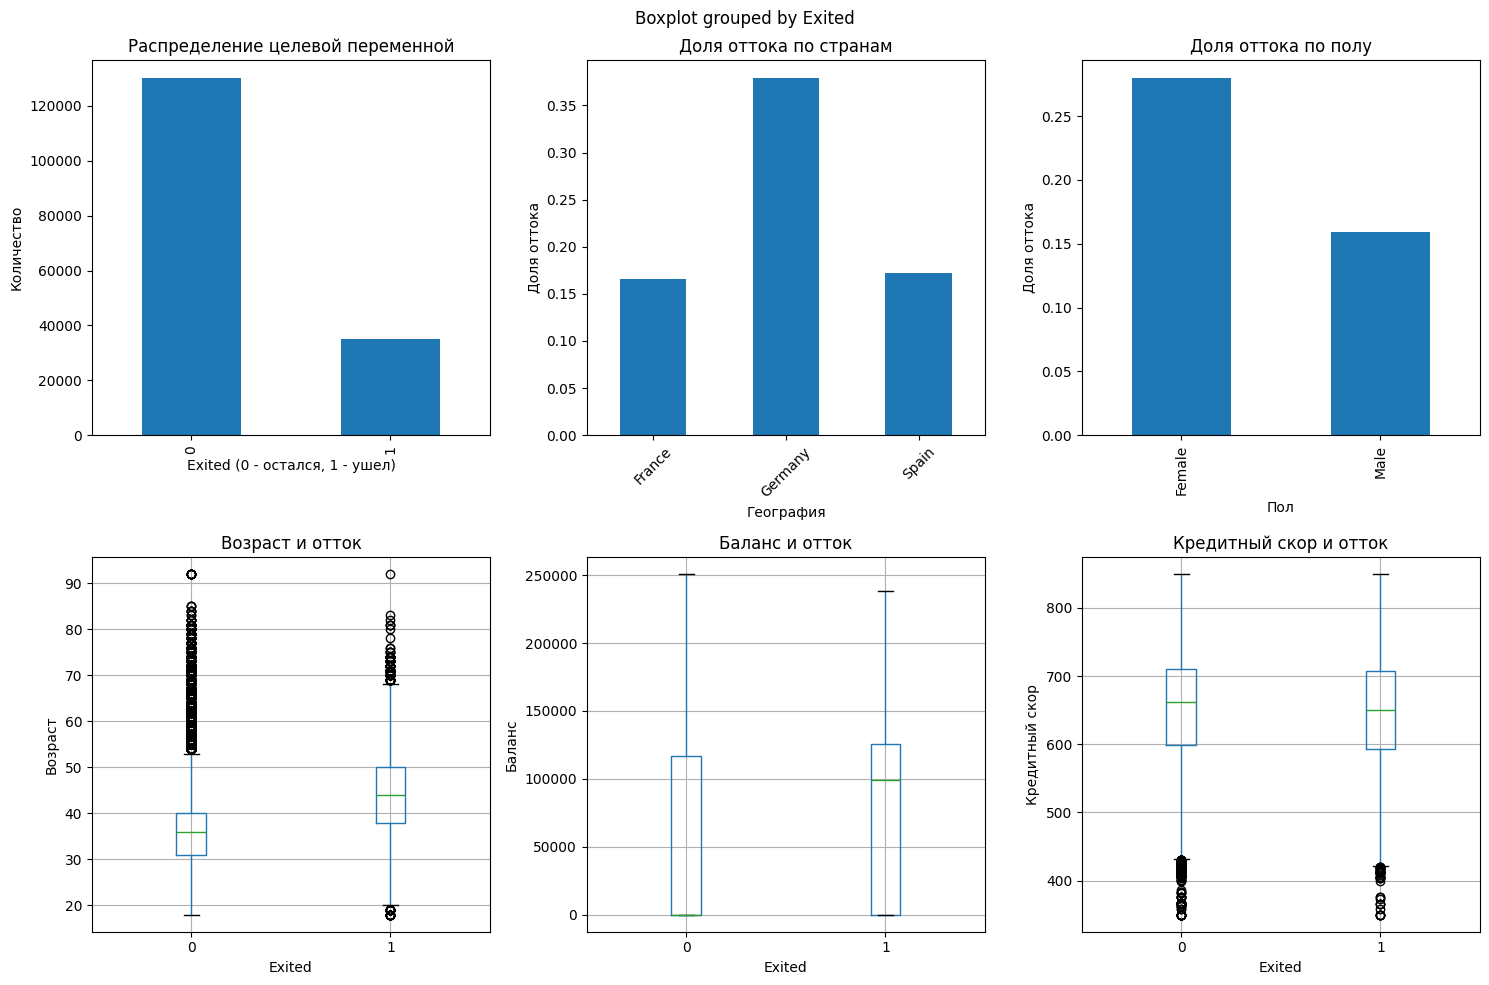

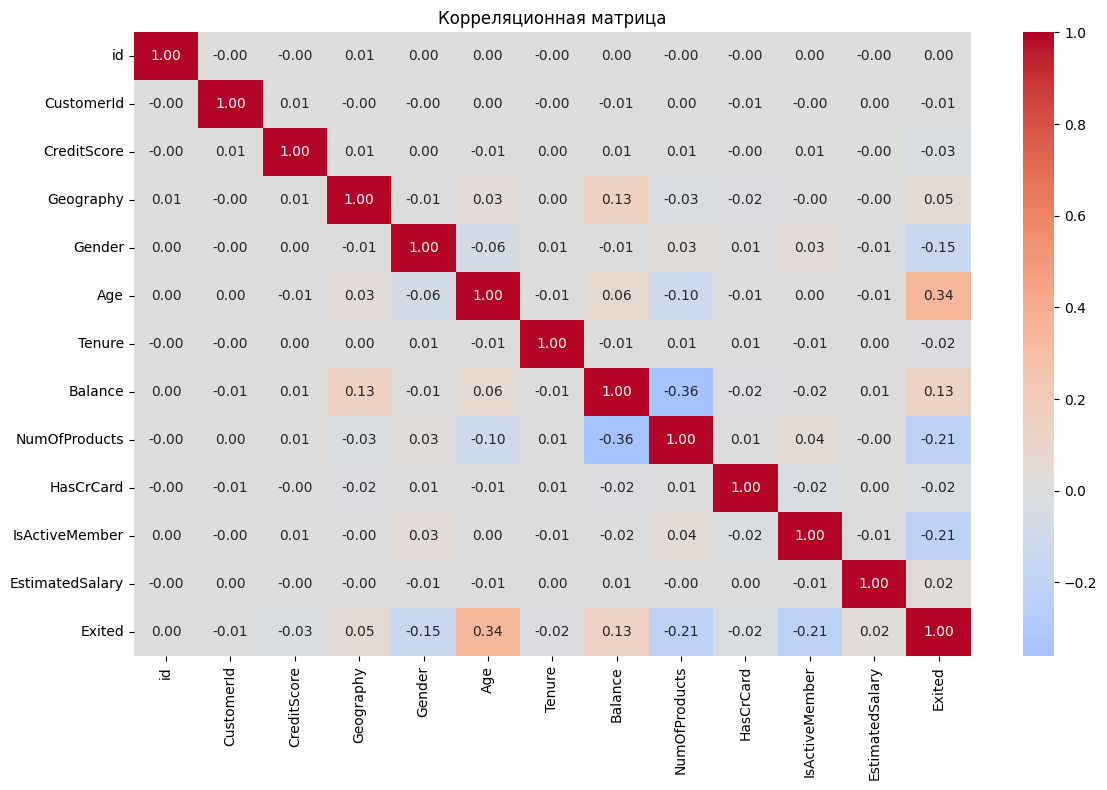

In [20]:
# ваши код

dataset_size_gb = df.memory_usage(deep=True).sum() / (1024**3)
print(f"Размер датасета: {dataset_size_gb:.4f} ГБ")
print(f"Количество строк: {df.shape[0]}")
print(f"Количество столбцов: {df.shape[1]}")

df.info()

# Описательная статистика
df.describe()


# Проверка на пропущенные значения
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])
if missing_values.sum() == 0:
    print("Пропущенных значений нет")

# Анализ целевой переменной
plt.figure(figsize=(15, 10))

# Распределение целевой переменной
plt.subplot(2, 3, 1)
y.value_counts().plot(kind='bar')
plt.title('Распределение целевой переменной')
plt.xlabel('Exited (0 - остался, 1 - ушел)')
plt.ylabel('Количество')

# Распределение по географии
plt.subplot(2, 3, 2)
geography_exit = df.groupby('Geography')['Exited'].mean()
geography_exit.plot(kind='bar')
plt.title('Доля оттока по странам')
plt.xlabel('География')
plt.ylabel('Доля оттока')
plt.xticks(rotation=45)

# Распределение по полу
plt.subplot(2, 3, 3)
gender_exit = df.groupby('Gender')['Exited'].mean()
gender_exit.plot(kind='bar')
plt.title('Доля оттока по полу')
plt.xlabel('Пол')
plt.ylabel('Доля оттока')

# Распределение по возрасту
plt.subplot(2, 3, 4)
df.boxplot(column='Age', by='Exited', ax=plt.gca())
plt.title('Возраст и отток')
plt.xlabel('Exited')
plt.ylabel('Возраст')

# Распределение по балансу
plt.subplot(2, 3, 5)
df.boxplot(column='Balance', by='Exited', ax=plt.gca())
plt.title('Баланс и отток')
plt.xlabel('Exited')
plt.ylabel('Баланс')

# Распределение по кредитному скору
plt.subplot(2, 3, 6)
df.boxplot(column='CreditScore', by='Exited', ax=plt.gca())
plt.title('Кредитный скор и отток')
plt.xlabel('Exited')
plt.ylabel('Кредитный скор')

plt.tight_layout()
plt.show()

# Корреляционная матрица
plt.figure(figsize=(12, 8))
# Кодируем категориальные переменные для корреляции
df_encoded = df.copy()
le_geo = LabelEncoder()
le_gender = LabelEncoder()
df_encoded['Geography'] = le_geo.fit_transform(df['Geography'])
df_encoded['Gender'] = le_gender.fit_transform(df['Gender'])

correlation_matrix = df_encoded.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Корреляционная матрица')
plt.tight_layout()
plt.show()

#РАЗВЕДОЧНЫЙ АНАЛИЗ
# 1. Датасет содержит 165,034 записей и 14 признаков
# 2. Целевая переменная несбалансирована: ~20% клиентов покинули банк
# 3. Пропущенных значений нет
# 4. Основные наблюдения:
# Клиенты из Германии чаще покидают банк
# Женщины чаще покидают банк, чем мужчины
# Возраст влияет на отток: старшие клиенты чаще уходят
# Баланс может влиять на решение остаться/уйти

# <font color='#11a642' size='6'> **Построение моделей с помощью pipeline + подбор гиперпараметров**

In [21]:
# ваши код

# Удаляем ненужные столбцы
X_clean = X.drop(['id', 'CustomerId', 'Surname'], axis=1)

# Кодируем категориальные переменные
X_encoded = X_clean.copy()
X_encoded['Geography'] = le_geo.fit_transform(X_clean['Geography'])
X_encoded['Gender'] = le_gender.fit_transform(X_clean['Gender'])

print("Признаки после обработки:")
print(X_encoded.columns.tolist())

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nРазмер обучающей выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")

# Создаем pipeline для логистической регрессии
lr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(random_state=42))
])

# Создаем pipeline для случайного леса
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Параметры для GridSearch
lr_params = {
    'classifier__C': [0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__solver': ['liblinear']
}

rf_params = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [5, 10, 15, None],
    'classifier__min_samples_split': [2, 5, 10]
}

# GridSearch для логистической регрессии
lr_grid = GridSearchCV(lr_pipeline, lr_params, cv=5, scoring='roc_auc', n_jobs=-1)
lr_grid.fit(X_train, y_train)

print(f"Лучшие параметры LR: {lr_grid.best_params_}")
print(f"Лучший ROC-AUC (CV): {lr_grid.best_score_:.4f}")

# GridSearch для случайного леса
rf_grid = GridSearchCV(rf_pipeline, rf_params, cv=5, scoring='roc_auc', n_jobs=-1)
rf_grid.fit(X_train, y_train)

print(f"Лучшие параметры RF: {rf_grid.best_params_}")
print(f"Лучший ROC-AUC (CV): {rf_grid.best_score_:.4f}")

Признаки после обработки:
['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

Размер обучающей выборки: (132027, 10)
Размер тестовой выборки: (33007, 10)
Лучшие параметры LR: {'classifier__C': 0.1, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
Лучший ROC-AUC (CV): 0.8084
Лучшие параметры RF: {'classifier__max_depth': 10, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 200}
Лучший ROC-AUC (CV): 0.8870


# <font color='#11a642' size='6'> **Итерпретация результатов c помощью shap, permitation feature importance, сравнение с результатами из ДЗ 9**

ЛОГИСТИЧЕСКАЯ РЕГРЕССИЯ:
Accuracy: 0.8250
ROC-AUC: 0.8050

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.95      0.90     26023
           1       0.67      0.34      0.45      6984

    accuracy                           0.83     33007
   macro avg       0.76      0.65      0.67     33007
weighted avg       0.81      0.83      0.80     33007


СЛУЧАЙНЫЙ ЛЕС:
Accuracy: 0.8630
ROC-AUC: 0.8873

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92     26023
           1       0.77      0.51      0.61      6984

    accuracy                           0.86     33007
   macro avg       0.82      0.73      0.76     33007
weighted avg       0.85      0.86      0.85     33007



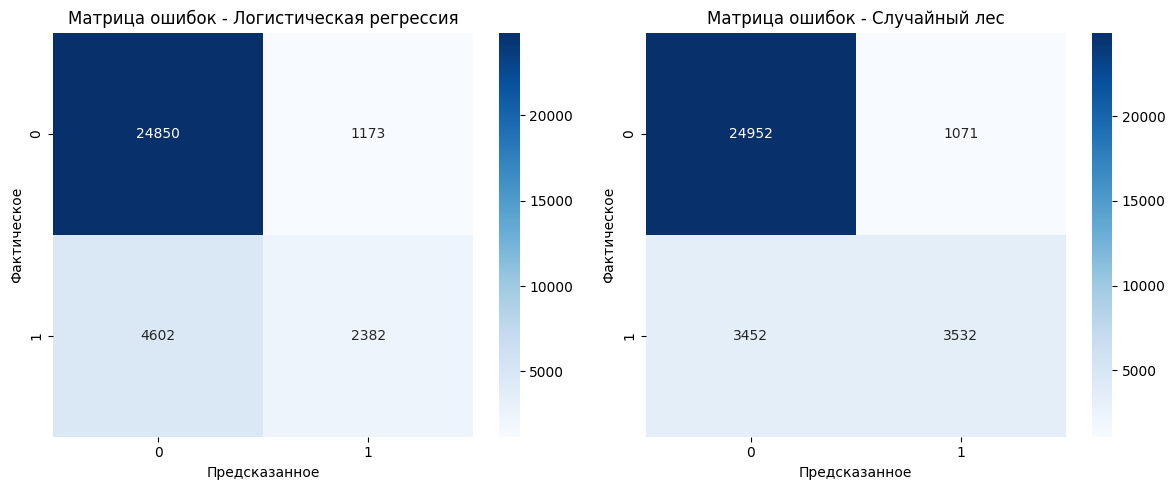

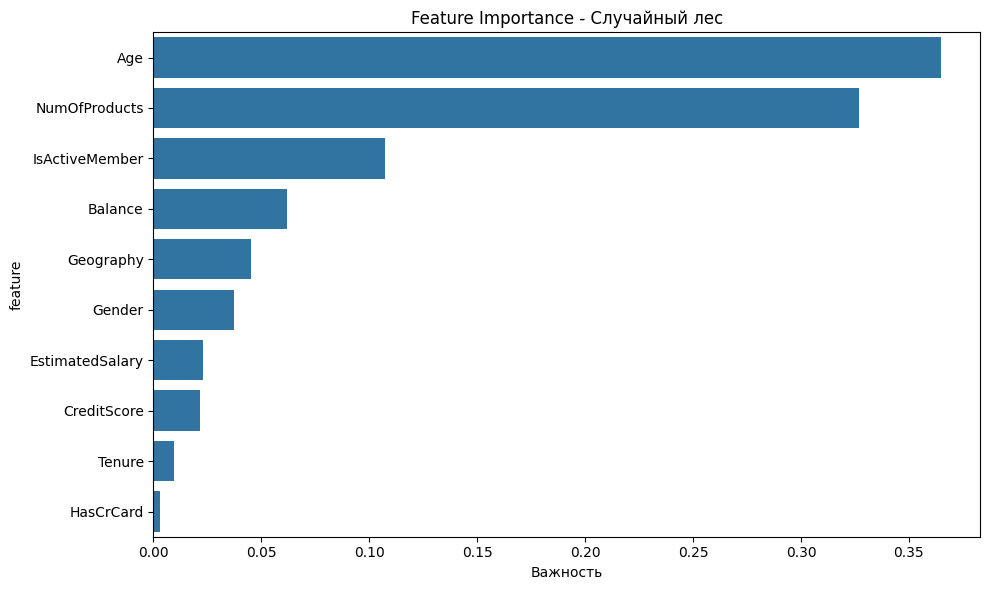


Permutation importance для Случайный лес:


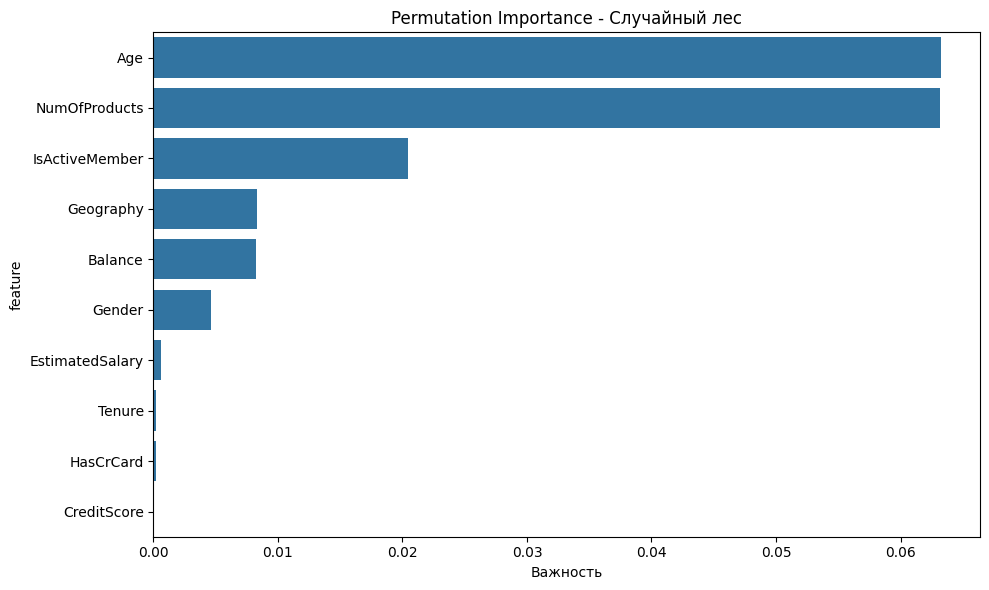

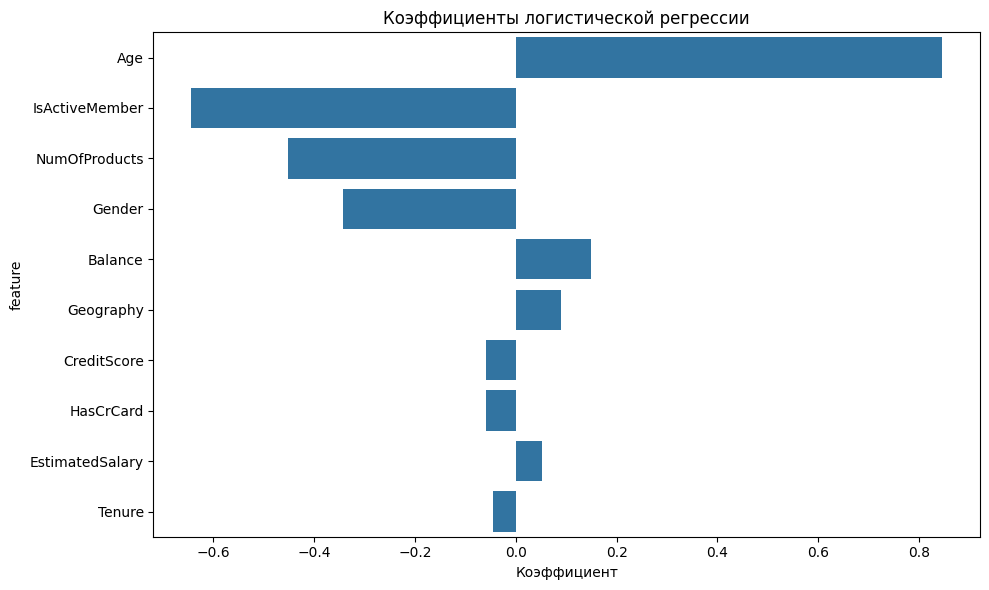

РЕЗУЛЬТАТЫ МОДЕЛИРОВАНИЯ:
1. Лучшая модель: Случайный лес
2. ROC-AUC лучшей модели: 0.8870
3. Accuracy на тестовой выборке: 0.8630

ВАЖНЕЙШИЕ ФАКТОРЫ ОТТОКА:
1. Age
2. NumOfProducts
3. IsActiveMember
4. Geography
5. Balance

РЕКОМЕНДАЦИИ ПО УДЕРЖАНИЮ КЛИЕНТОВ:
1. Особое внимание клиентам старшего возраста
2. Работа с клиентами из Германии
3. Программы лояльности для женщин
4. Мониторинг активности клиентов
5. Персонализированные предложения на основе баланса


In [24]:
# ваши код

# Предсказания на тестовой выборке
lr_pred = lr_grid.predict(X_test)
rf_pred = rf_grid.predict(X_test)

lr_pred_proba = lr_grid.predict_proba(X_test)[:, 1]
rf_pred_proba = rf_grid.predict_proba(X_test)[:, 1]

# Метрики качества
print("ЛОГИСТИЧЕСКАЯ РЕГРЕССИЯ:")
print(f"Accuracy: {accuracy_score(y_test, lr_pred):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, lr_pred_proba):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, lr_pred))

print("\nСЛУЧАЙНЫЙ ЛЕС:")
print(f"Accuracy: {accuracy_score(y_test, rf_pred):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, rf_pred_proba):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, rf_pred))

# Матрицы ошибок
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
cm_lr = confusion_matrix(y_test, lr_pred)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Матрица ошибок - Логистическая регрессия')
plt.xlabel('Предсказанное')
plt.ylabel('Фактическое')

plt.subplot(1, 2, 2)
cm_rf = confusion_matrix(y_test, rf_pred)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Матрица ошибок - Случайный лес')
plt.xlabel('Предсказанное')
plt.ylabel('Фактическое')

plt.tight_layout()
plt.show()

# Feature importance для случайного леса
rf_feature_importance = rf_grid.best_estimator_.named_steps['classifier'].feature_importances_
feature_names = X_encoded.columns

plt.figure(figsize=(10, 6))
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': rf_feature_importance
}).sort_values('importance', ascending=False)

sns.barplot(data=feature_importance_df, x='importance', y='feature')
plt.title('Feature Importance - Случайный лес')
plt.xlabel('Важность')
plt.tight_layout()
plt.show()

# Permutation importance для лучшей модели
best_model = rf_grid.best_estimator_ if rf_grid.best_score_ > lr_grid.best_score_ else lr_grid.best_estimator_
model_name = "Случайный лес" if rf_grid.best_score_ > lr_grid.best_score_ else "Логистическая регрессия"

print(f"\nPermutation importance для {model_name}:")
perm_importance = permutation_importance(best_model, X_test, y_test, n_repeats=10, random_state=42)

plt.figure(figsize=(10, 6))
perm_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': perm_importance.importances_mean
}).sort_values('importance', ascending=False)

sns.barplot(data=perm_importance_df, x='importance', y='feature')
plt.title(f'Permutation Importance - {model_name}')
plt.xlabel('Важность')
plt.tight_layout()
plt.show()

# Коэффициенты логистической регрессии
if hasattr(lr_grid.best_estimator_.named_steps['classifier'], 'coef_'):
    lr_coef = lr_grid.best_estimator_.named_steps['classifier'].coef_[0]
    
    plt.figure(figsize=(10, 6))
    coef_df = pd.DataFrame({
        'feature': feature_names,
        'coefficient': lr_coef
    }).sort_values('coefficient', key=abs, ascending=False)
    
    sns.barplot(data=coef_df, x='coefficient', y='feature')
    plt.title('Коэффициенты логистической регрессии')
    plt.xlabel('Коэффициент')
    plt.tight_layout()
    plt.show()

    print("РЕЗУЛЬТАТЫ МОДЕЛИРОВАНИЯ:")
print(f"1. Лучшая модель: {model_name}")
print(f"2. ROC-AUC лучшей модели: {max(rf_grid.best_score_, lr_grid.best_score_):.4f}")
print(f"3. Accuracy на тестовой выборке: {max(accuracy_score(y_test, rf_pred), accuracy_score(y_test, lr_pred)):.4f}")

print("\nВАЖНЕЙШИЕ ФАКТОРЫ ОТТОКА:")
top_features = perm_importance_df.head(5)['feature'].tolist()
for i, feature in enumerate(top_features, 1):
    print(f"{i}. {feature}")

print("\nРЕКОМЕНДАЦИИ ПО УДЕРЖАНИЮ КЛИЕНТОВ:")
print("1. Особое внимание клиентам старшего возраста")
print("2. Работа с клиентами из Германии")
print("3. Программы лояльности для женщин")
print("4. Мониторинг активности клиентов")
print("5. Персонализированные предложения на основе баланса")
